In [3]:
pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 7.3 MB/s 


In [6]:
import pandas as pd
import neattext.functions as nfx

In [7]:

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel

In [9]:
df = pd.read_csv('courses_data.csv')
df.head()

,Title,Description,User_enrolled,Rating,User_vote,Link,Category,Level
0,2020 Complete Python Bootcamp: From Zero to He...,Learn Python like a Professional! Start from t...,1100093.0,4.6,318066.0,https://www.udemy.com/course/complete-python-b...,Tech,All Levels
1,The Web Developer Bootcamp,The only course you need to learn web developm...,596726.0,4.6,182997.0,https://www.udemy.com/course/the-web-developer...,Tech,All Levels
2,Machine Learning A-Z™: Hands-On Python & R In ...,Learn to create Machine Learning Algorithms in...,692812.0,4.5,132228.0,https://www.udemy.com/course/machinelearning/,Tech,All Levels
3,Angular - The Complete Guide (2020 Edition),"Master Angular 10 (formerly ""Angular 2"") and b...",422557.0,4.6,129984.0,https://www.udemy.com/course/the-complete-guid...,Tech,All Levels
4,Java Programming Masterclass for Software Deve...,Learn Java In This Course And Become a Compute...,502572.0,4.6,123798.0,https://www.udemy.com/course/java-the-complete...,Tech,Intermediate


In [10]:
##shape of the dataset
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.') 

The dataset has 8855 rows and 8 columns.


In [11]:
#Check the info of the data set which describes null values, data type, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8855 entries, 0 to 8854
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          8855 non-null   object 
 1   Description    8854 non-null   object 
 2   User_enrolled  8854 non-null   float64
 3   Rating         8854 non-null   float64
 4   User_vote      8854 non-null   float64
 5   Link           8854 non-null   object 
 6   Category       8854 non-null   object 
 7   Level          8854 non-null   object 
dtypes: float64(3), object(5)
memory usage: 553.6+ KB


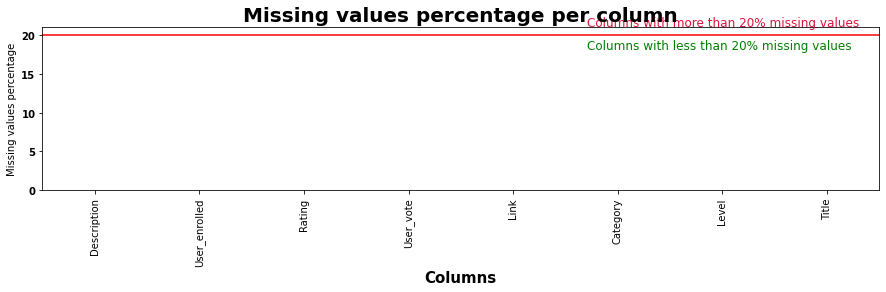

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
def msv_1(df, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (df.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    
    plt.text(len(df.isnull().sum()/len(df))/1.7, thresh+2.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(df.isnull().sum()/len(df))/1.7, thresh - 0.5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()
msv_1(df, 20, color=sns.color_palette('Reds',15))

In [13]:
print(f'There are {df.isnull().any().sum()} columns in courses dataset with missing values.')

There are 7 columns in courses dataset with missing values.


In [14]:
df['Title']

0       2020 Complete Python Bootcamp: From Zero to He...
1                              The Web Developer Bootcamp
2       Machine Learning A-Z™: Hands-On Python & R In ...
3             Angular - The Complete Guide (2020 Edition)
4       Java Programming Masterclass for Software Deve...
                              ...                        
8850    Sikuli Automation Using Java and Python + 5 Ki...
8851                      From zero to a Gatsby developer
8852    React Web Development || Become a React Developer
8853    Build Full Stack Django 3 Blog app and REST AP...
8854                    MicroPython and the Internet of T
Name: Title, Length: 8855, dtype: object

In [15]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [16]:
# Clean Text:stopwords,special charac
df['Title'] = df['Title'].apply(nfx.remove_stopwords)

In [17]:
# Clean Text:stopwords,special charac
df['Title'] = df['Title'].apply(nfx.remove_special_characters)

In [18]:
df[['Title','Title']]

,Title,Title
0,2020 Complete Python Bootcamp Zero Hero Python,2020 Complete Python Bootcamp Zero Hero Python
1,Web Developer Bootcamp,Web Developer Bootcamp
2,Machine Learning AZ HandsOn Python R Data Sci...,Machine Learning AZ HandsOn Python R Data Sci...
3,Angular Complete Guide 2020 Edition,Angular Complete Guide 2020 Edition
4,Java Programming Masterclass Software Developers,Java Programming Masterclass Software Developers
...,...,...
8850,Sikuli Automation Java Python 5 Kickass Projects,Sikuli Automation Java Python 5 Kickass Projects
8851,zero Gatsby developer,zero Gatsby developer
8852,React Web Development React Developer,React Web Development React Developer
8853,Build Stack Django 3 Blog app REST API Python,Build Stack Django 3 Blog app REST API Python


In [19]:
# Vectorize our Text
count_vect = CountVectorizer()
cv_mat = count_vect.fit_transform(df['Title'])

In [20]:
# Sparse
cv_mat

<8855x4353 sparse matrix of type '<class 'numpy.int64'>'
	with 45369 stored elements in Compressed Sparse Row format>

In [21]:
# Dense
cv_mat.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [22]:
df_cv_words = pd.DataFrame(cv_mat.todense(),columns=count_vect.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
df_cv_words.head()

,071,10,100,1000,100practice,101,102,10million,10s,10x,...,zapworks,zbrush,zend,zenda,zero,zerotohero,zf2,zoho,zookeeper,zynq
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Cosine Similarity Matrix
cosine_sim_mat = cosine_similarity(cv_mat)

In [25]:
cosine_sim_mat

array([[1.        , 0.19245009, 0.25197632, ..., 0.        , 0.23570226,
        0.        ],
       [0.19245009, 1.        , 0.        , ..., 0.43643578, 0.        ,
        0.        ],
       [0.25197632, 0.        , 1.        , ..., 0.        , 0.13363062,
        0.        ],
       ...,
       [0.        , 0.43643578, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.23570226, 0.        , 0.13363062, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

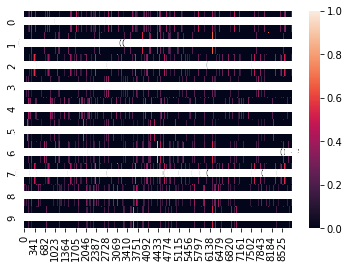

In [26]:
sns.heatmap(cosine_sim_mat[0:10],annot=True)

In [28]:
df.head()

,Title,Description,User_enrolled,Rating,User_vote,Link,Category,Level
0,2020 Complete Python Bootcamp Zero Hero Python,Learn Python like a Professional! Start from t...,1100093.0,4.6,318066.0,https://www.udemy.com/course/complete-python-b...,Tech,All Levels
1,Web Developer Bootcamp,The only course you need to learn web developm...,596726.0,4.6,182997.0,https://www.udemy.com/course/the-web-developer...,Tech,All Levels
2,Machine Learning AZ HandsOn Python R Data Sci...,Learn to create Machine Learning Algorithms in...,692812.0,4.5,132228.0,https://www.udemy.com/course/machinelearning/,Tech,All Levels
3,Angular Complete Guide 2020 Edition,"Master Angular 10 (formerly ""Angular 2"") and b...",422557.0,4.6,129984.0,https://www.udemy.com/course/the-complete-guid...,Tech,All Levels
4,Java Programming Masterclass Software Developers,Learn Java In This Course And Become a Compute...,502572.0,4.6,123798.0,https://www.udemy.com/course/java-the-complete...,Tech,Intermediate


In [29]:
# Get Course ID/Index
course_indices = pd.Series(df.index,index=df['Title']).drop_duplicates()

In [30]:
course_indices

Title
2020 Complete Python Bootcamp Zero Hero Python           0
Web Developer Bootcamp                                   1
Machine Learning AZ HandsOn Python  R Data Science       2
Angular  Complete Guide 2020 Edition                     3
Java Programming Masterclass Software Developers         4
                                                      ... 
Sikuli Automation Java Python  5 Kickass Projects     8850
zero Gatsby developer                                 8851
React Web Development  React Developer                8852
Build Stack Django 3 Blog app REST API Python         8853
MicroPython Internet                                  8854
Length: 8855, dtype: int64

In [33]:
course_indices['Java Programming Masterclass Software Developers']

4

In [34]:
idx = course_indices['Java Programming Masterclass Software Developers']
idx

4

In [35]:
scores = list(enumerate(cosine_sim_mat[idx]))
scores

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.9999999999999999),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.19999999999999998),
 (12, 0.0),
 (13, 0.0),
 (14, 0.4472135954999579),
 (15, 0.0),
 (16, 0.0),
 (17, 0.19999999999999998),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.18257418583505539),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.25819888974716115),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.0),
 (44, 0.0),
 (45, 0.0),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.0),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (53, 0.0),
 (54, 0.0),
 (55, 0.0),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0),
 (59, 0.0),
 (60, 0.0),
 (61, 0.0),
 (62, 0.0),
 (63, 0.0),
 (64, 0.0),
 (65, 0.0),
 (66, 0.0),
 (67, 0.0),
 (68, 0.0),
 (69, 0.19999999999999998),
 (70, 0.0),
 (71, 0.18257418583505539),
 (72, 0.0),
 (73, 0.

In [36]:
# Sort our scores per cosine score
sorted_scores = sorted(scores,key=lambda x:x[1],reverse=True)

In [37]:
# Omit the First Value/itself
sorted_scores[1:]

[(7392, 0.6708203932499369),
 (2256, 0.6324555320336758),
 (8331, 0.6),
 (4064, 0.5477225575051662),
 (6102, 0.5477225575051662),
 (447, 0.5163977794943223),
 (502, 0.5163977794943223),
 (847, 0.5163977794943223),
 (978, 0.5163977794943223),
 (1352, 0.5163977794943223),
 (1359, 0.5163977794943223),
 (2199, 0.5163977794943223),
 (2531, 0.5163977794943223),
 (3706, 0.5163977794943223),
 (4177, 0.5163977794943223),
 (4859, 0.5163977794943223),
 (4861, 0.5163977794943223),
 (4951, 0.5163977794943223),
 (8201, 0.5163977794943223),
 (2895, 0.50709255283711),
 (3335, 0.50709255283711),
 (3607, 0.50709255283711),
 (4300, 0.50709255283711),
 (6944, 0.50709255283711),
 (2245, 0.47809144373375745),
 (3702, 0.47809144373375745),
 (702, 0.47434164902525683),
 (1550, 0.47434164902525683),
 (2239, 0.47434164902525683),
 (3142, 0.47434164902525683),
 (6367, 0.47434164902525683),
 (14, 0.4472135954999579),
 (99, 0.4472135954999579),
 (606, 0.4472135954999579),
 (635, 0.4472135954999579),
 (1734, 0.4472

In [38]:
# Selected Courses Indices
selected_course_indices = [i[0] for i in sorted_scores[1:]]

In [39]:
selected_course_indices

[7392,
 2256,
 8331,
 4064,
 6102,
 447,
 502,
 847,
 978,
 1352,
 1359,
 2199,
 2531,
 3706,
 4177,
 4859,
 4861,
 4951,
 8201,
 2895,
 3335,
 3607,
 4300,
 6944,
 2245,
 3702,
 702,
 1550,
 2239,
 3142,
 6367,
 14,
 99,
 606,
 635,
 1734,
 1844,
 1886,
 2175,
 2501,
 2686,
 2732,
 2975,
 3051,
 3120,
 3251,
 3837,
 3852,
 4026,
 4275,
 4486,
 4553,
 4555,
 4591,
 4979,
 5056,
 5191,
 5196,
 5351,
 5686,
 5687,
 6993,
 7091,
 7479,
 7848,
 8040,
 8329,
 8362,
 4222,
 7502,
 139,
 158,
 704,
 885,
 1079,
 1611,
 2512,
 2778,
 3054,
 3065,
 3070,
 3086,
 3295,
 4225,
 4347,
 4788,
 5107,
 5120,
 5184,
 5818,
 5992,
 6683,
 7235,
 7301,
 7689,
 7701,
 7706,
 8328,
 8526,
 275,
 493,
 744,
 948,
 1808,
 1907,
 1947,
 2349,
 2386,
 2422,
 2431,
 2458,
 2491,
 2588,
 2947,
 3074,
 3138,
 3383,
 4242,
 4883,
 4924,
 4938,
 5253,
 5300,
 5824,
 6071,
 6108,
 6916,
 7067,
 7402,
 7440,
 8030,
 8302,
 8322,
 112,
 1348,
 1824,
 2353,
 2407,
 3379,
 3427,
 4306,
 5482,
 6344,
 6841,
 6850,
 7221

In [40]:
# Selected Courses Scores
selected_course_scores = [i[1] for i in sorted_scores[1:]]

In [41]:
recommended_result = df['Title'].iloc[selected_course_indices]
rec_df = pd.DataFrame(recommended_result)

In [42]:
rec_df.head()

,Title
7392,Java Programming Eclipse developers
2256,Programming JAVA
8331,Java Programming Mobile Developers Lite
4064,Java Masterclass Beginner OOP Programming Ecl...
6102,Java Masterclass Beginner OOP Programming Net...


In [43]:
rec_df['similarity_scores'] = selected_course_scores
rec_df

,Title,similarity_scores
7392,Java Programming Eclipse developers,0.670820
2256,Programming JAVA,0.632456
8331,Java Programming Mobile Developers Lite,0.600000
4064,Java Masterclass Beginner OOP Programming Ecl...,0.547723
6102,Java Masterclass Beginner OOP Programming Net...,0.547723
...,...,...
8849,WordPress Course2020Learn WordPress Scratch Money,0.000000
8851,zero Gatsby developer,0.000000
8852,React Web Development React Developer,0.000000
8853,Build Stack Django 3 Blog app REST API Python,0.000000


In [44]:
def recommend_course(title,num_of_rec=10):
    # ID for title
    idx = course_indices[title]
    # Course Indice
    # Search inside cosine_sim_mat
    scores = list(enumerate(cosine_sim_mat[idx]))
    # Scores
    # Sort Scores
    sorted_scores = sorted(scores,key=lambda x:x[1],reverse=True)
    # Recomm
    selected_course_indices = [i[0] for i in sorted_scores[1:]]
    selected_course_scores = [i[1] for i in sorted_scores[1:]]
    result = df['Title'].iloc[selected_course_indices]
    rec_df = pd.DataFrame(result)
    rec_df['similarity_scores'] = selected_course_scores
    return rec_df.head(num_of_rec)

In [47]:
recommend_course('Java Programming Masterclass Software Developers',20)

,Title,similarity_scores
7392,Java Programming Eclipse developers,0.670820
2256,Programming JAVA,0.632456
8331,Java Programming Mobile Developers Lite,0.600000
4064,Java Masterclass Beginner OOP Programming Ecl...,0.547723
6102,Java Masterclass Beginner OOP Programming Net...,0.547723
447,Docker Java Developers,0.516398
502,Kotlin Java Developers,0.516398
847,Angular 4 Java Developers,0.516398
978,Advanced Java Programming,0.516398
1352,CUDA programming Masterclass,0.516398


In [49]:
df.to_csv("courses_data_clean.csv")